In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
coin = 'Bitcoin'

In [3]:
data = np.array(pd.read_csv('price.csv')[coin])
data

array([37448.77, 37483.25, 37460.57, 37373.51, 37289.75, 37357.68,
       37370.93, 37307.26, 37318.11, 37412.98, 37411.32, 37335.73,
       37319.89, 37374.02, 37374.  , 37388.19, 37375.3 , 37333.34,
       37315.4 , 37294.83, 37427.04, 37498.92, 37527.03, 37449.91,
       37235.1 , 37226.41, 37289.74, 37158.44, 37184.29, 37217.56,
       37180.91, 37163.67, 37023.38, 36956.27, 36856.18, 36829.3 ,
       36889.86, 36844.92, 36624.61, 36556.55, 36684.46, 36725.73,
       36749.32, 36772.32, 36775.77, 36895.19, 36850.02, 36538.09,
       36351.65, 36531.28, 36497.41, 36567.03, 36599.74, 36557.39,
       36525.36, 36571.58, 36502.95, 36519.9 , 36581.89, 36528.68,
       36432.47, 36255.38, 36334.89, 36140.82, 36286.19, 36205.87,
       36215.92, 36220.52, 36060.36, 35808.49, 35577.07, 35822.78,
       35866.41, 35981.34, 35781.65, 35740.52, 36051.83, 36038.48,
       36044.34, 35930.46])

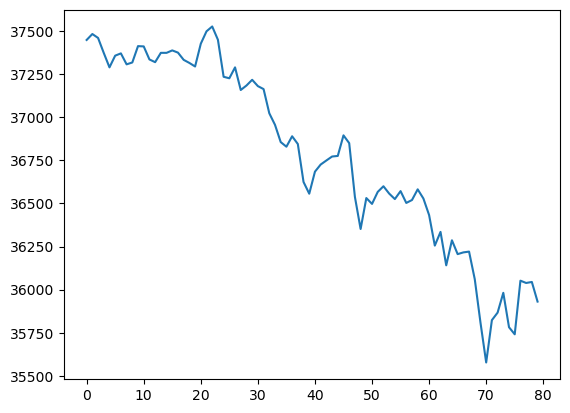

In [4]:
plt.plot(data)

### Convolution Here, I perform convolution.

For example, with an array [1, 2, 3, 4] and a convolution size of 2, it results in [1, 2], [2, 3], [3, 4], allowing us to find the difference later.

In [5]:
wind = np.lib.stride_tricks.sliding_window_view(data, (3,))
wind

array([[37448.77, 37483.25, 37460.57],
       [37483.25, 37460.57, 37373.51],
       [37460.57, 37373.51, 37289.75],
       [37373.51, 37289.75, 37357.68],
       [37289.75, 37357.68, 37370.93],
       [37357.68, 37370.93, 37307.26],
       [37370.93, 37307.26, 37318.11],
       [37307.26, 37318.11, 37412.98],
       [37318.11, 37412.98, 37411.32],
       [37412.98, 37411.32, 37335.73],
       [37411.32, 37335.73, 37319.89],
       [37335.73, 37319.89, 37374.02],
       [37319.89, 37374.02, 37374.  ],
       [37374.02, 37374.  , 37388.19],
       [37374.  , 37388.19, 37375.3 ],
       [37388.19, 37375.3 , 37333.34],
       [37375.3 , 37333.34, 37315.4 ],
       [37333.34, 37315.4 , 37294.83],
       [37315.4 , 37294.83, 37427.04],
       [37294.83, 37427.04, 37498.92],
       [37427.04, 37498.92, 37527.03],
       [37498.92, 37527.03, 37449.91],
       [37527.03, 37449.91, 37235.1 ],
       [37449.91, 37235.1 , 37226.41],
       [37235.1 , 37226.41, 37289.74],
       [37226.41, 37289.7

In [6]:
dxy = np.zeros((wind.shape[0], 2))
dxy[:, 0] = wind[:, 1] - wind[:, 0]
dxy[:, 1] = wind[:, 2] - wind[:, 1]
dxy

array([[ 3.4480e+01, -2.2680e+01],
       [-2.2680e+01, -8.7060e+01],
       [-8.7060e+01, -8.3760e+01],
       [-8.3760e+01,  6.7930e+01],
       [ 6.7930e+01,  1.3250e+01],
       [ 1.3250e+01, -6.3670e+01],
       [-6.3670e+01,  1.0850e+01],
       [ 1.0850e+01,  9.4870e+01],
       [ 9.4870e+01, -1.6600e+00],
       [-1.6600e+00, -7.5590e+01],
       [-7.5590e+01, -1.5840e+01],
       [-1.5840e+01,  5.4130e+01],
       [ 5.4130e+01, -2.0000e-02],
       [-2.0000e-02,  1.4190e+01],
       [ 1.4190e+01, -1.2890e+01],
       [-1.2890e+01, -4.1960e+01],
       [-4.1960e+01, -1.7940e+01],
       [-1.7940e+01, -2.0570e+01],
       [-2.0570e+01,  1.3221e+02],
       [ 1.3221e+02,  7.1880e+01],
       [ 7.1880e+01,  2.8110e+01],
       [ 2.8110e+01, -7.7120e+01],
       [-7.7120e+01, -2.1481e+02],
       [-2.1481e+02, -8.6900e+00],
       [-8.6900e+00,  6.3330e+01],
       [ 6.3330e+01, -1.3130e+02],
       [-1.3130e+02,  2.5850e+01],
       [ 2.5850e+01,  3.3270e+01],
       [ 3.3270e+01,

Output Only

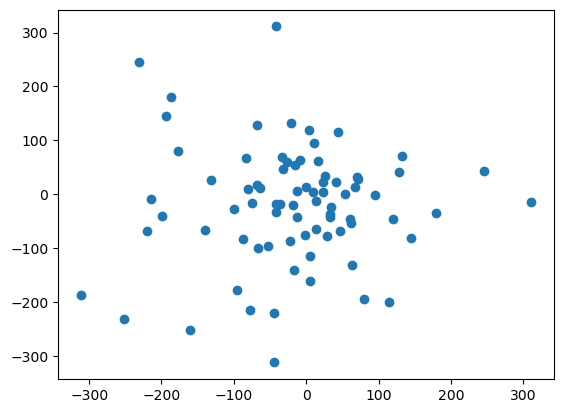

In [7]:
plt.scatter(x=dxy[:, 0], y=dxy[:, 1])

This is for verification

In [8]:
mask_plus = dxy[:, 0] >= 0
mask_minus = dxy[:, 0] < 0
print(f'count: {dxy.shape[0]}\nmax: {dxy.max()}, min: {dxy.min()}\n<0: -{mask_minus.sum()}, >=0: {mask_plus.sum()}')
print(f'sum: {data[-2] - data[0]}, {dxy[:, 0][mask_minus].sum() + dxy[:, 0][mask_plus].sum()}')
print(f'<0: {dxy[:, 0][mask_minus].sum()}; >=0: {dxy[:, 0][mask_plus].sum()}')

count: 78
max: 311.31000000000495, min: -311.9300000000003
<0: -43, >=0: 35
sum: -1404.4300000000003, -1404.4300000000003
<0: -3816.069999999978; >=0: 2411.6399999999776


Just a Check

(array([ 2.,  5.,  5., 11., 19., 22.,  8.,  4.,  1.,  1.]),
 array([-3.11930e+02, -2.49606e+02, -1.87282e+02, -1.24958e+02,
        -6.26340e+01, -3.10000e-01,  6.20140e+01,  1.24338e+02,
         1.86662e+02,  2.48986e+02,  3.11310e+02]),
 <BarContainer object of 10 artists>)

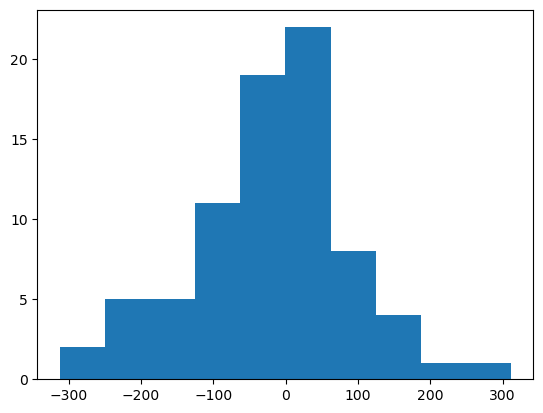

In [9]:
plt.hist(dxy[:, 0])

### Investigation for Optimal Number of Groups (N points in each group)

Well, logically, it is necessary to sort the first column (which corresponds to the previous step).

In [10]:
N = 13
grouped_arr = dxy[np.argsort(dxy[:, 0])[::-1]]

grouped_arr

array([[ 3.1131e+02, -1.3350e+01],
       [ 2.4571e+02,  4.3630e+01],
       [ 1.7963e+02, -3.3870e+01],
       [ 1.4537e+02, -8.0320e+01],
       [ 1.3221e+02,  7.1880e+01],
       [ 1.2791e+02,  4.1270e+01],
       [ 1.1942e+02, -4.5170e+01],
       [ 1.1493e+02, -1.9969e+02],
       [ 9.4870e+01, -1.6600e+00],
       [ 7.9510e+01, -1.9407e+02],
       [ 7.1880e+01,  2.8110e+01],
       [ 6.9620e+01,  3.2710e+01],
       [ 6.7930e+01,  1.3250e+01],
       [ 6.3330e+01, -1.3130e+02],
       [ 6.1990e+01, -5.3210e+01],
       [ 6.0560e+01, -4.4940e+01],
       [ 5.4130e+01, -2.0000e-02],
       [ 4.6220e+01, -6.8630e+01],
       [ 4.3630e+01,  1.1493e+02],
       [ 4.1270e+01,  2.3590e+01],
       [ 3.4480e+01, -2.2680e+01],
       [ 3.3270e+01, -3.6650e+01],
       [ 3.2710e+01, -4.2350e+01],
       [ 2.8110e+01, -7.7120e+01],
       [ 2.5850e+01,  3.3270e+01],
       [ 2.3590e+01,  2.3000e+01],
       [ 2.3000e+01,  3.4500e+00],
       [ 1.6950e+01,  6.1990e+01],
       [ 1.4190e+01,

Here are the constraint data.

In [11]:
arr = np.append(grouped_arr[::N][:, 0], grouped_arr[-1, 0]-1)
arr

array([ 311.31,   63.33,   23.  ,  -13.35,  -44.94, -100.09, -312.93])

Here, I simply output by groups.

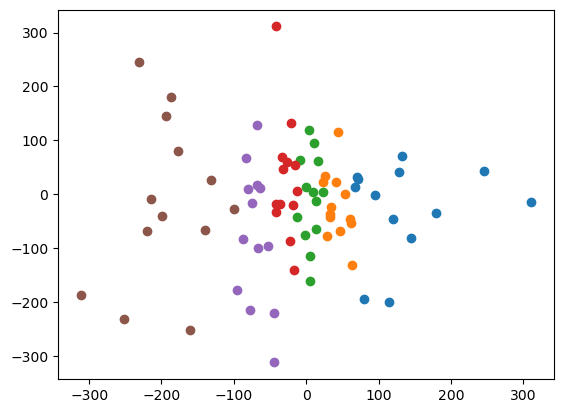

In [12]:
for i in range(arr.shape[0]-1):
    mask = (dxy[:, 0] <= arr[i]) & (dxy[:, 0] > arr[i+1])
    plt.scatter(x=dxy[mask][:, 0], y=dxy[mask][:, 1])
plt.show()

### Process of Selecting Outlier Rejection Methods

I stopped at percentiles, where 5% and 95% bounds exist. It's challenging to fine-tune because of the limited data.

The red strip represents the mean, and the green percentiles.

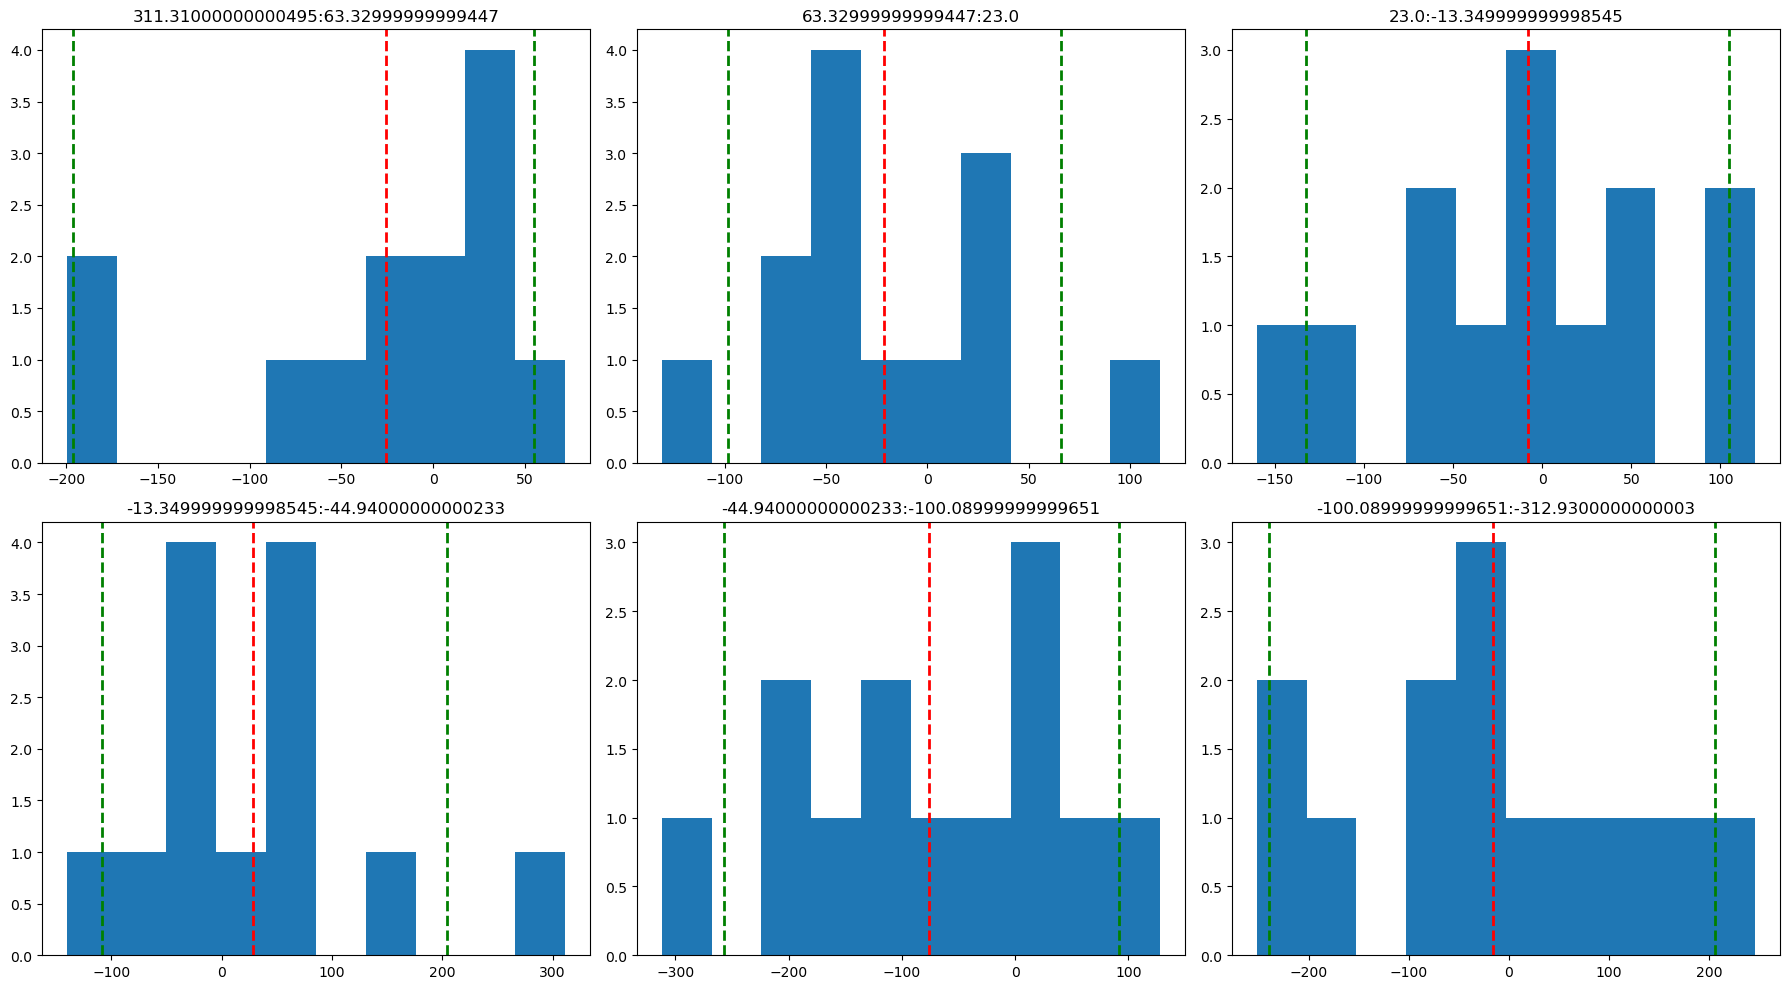

In [13]:
fig, axes = plt.subplots(nrows=((dxy.shape[0]//N)//3)+((dxy.shape[0]//N)%3>0), ncols=3, figsize=(18, 10))
for i in range(1, arr.shape[0]):
    mask = (dxy[:, 0] <= arr[i-1]) & (dxy[:, 0] > arr[i])
    data = dxy[mask][:, 1]

    row = (i - 1) // 3
    col = (i - 1) % 3

    ax = axes[row, col]
    ax.hist(data, bins=10)
    ax.set_title(f'{arr[i-1]}:{arr[i]}')
    mean = data.mean()

    low = np.percentile(data, 5)
    high = np.percentile(data, 95)
    ax.axvline(mean, color='red', linestyle='dashed', linewidth=2)
    ax.axvline(low, color='green', linestyle='dashed', linewidth=2)
    ax.axvline(high, color='green', linestyle='dashed', linewidth=2)

plt.tight_layout()
plt.show()

Added Outlier Distributions to the Overall Distribution, then Visualized

This was done to understand if the selected methods and parameters are optimal.

12


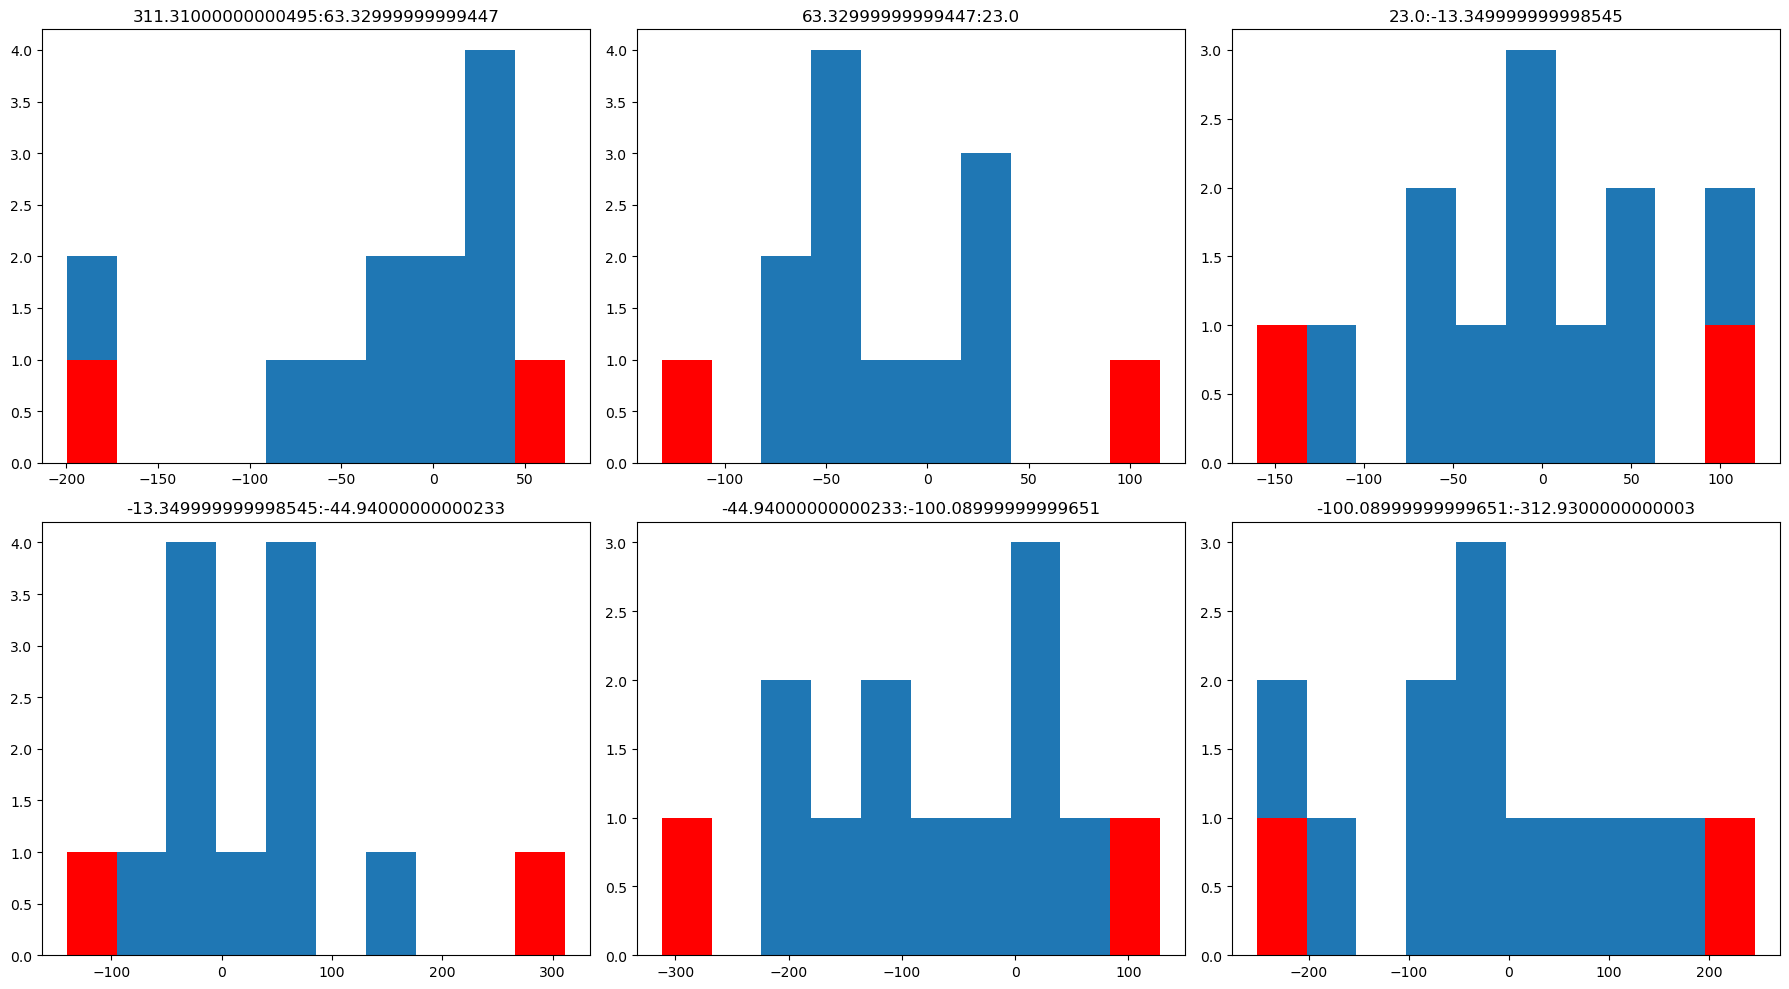

In [14]:
sum_o = 0

fig, axes = plt.subplots(nrows=((dxy.shape[0]//N)//3)+((dxy.shape[0]//N)%3>0), ncols=3, figsize=(18, 10))
for i in range(1, arr.shape[0]):
    mask = (dxy[:, 0] <= arr[i-1]) & (dxy[:, 0] > arr[i])
    data = dxy[mask][:, 1]

    row = (i - 1) // 3
    col = (i - 1) % 3

    ax = axes[row, col]
    ax.hist(data, bins=10)
    ax.set_title(f'{arr[i-1]}:{arr[i]}')
    mean = data.mean()

    low = np.percentile(data, 5)
    high = np.percentile(data, 95)
    mask_outliners = (data<low) | (data>high)
    ax.hist(data[mask_outliners], color='red')
    sum_o += mask_outliners.sum()
print(sum_o)
plt.tight_layout()
plt.show()


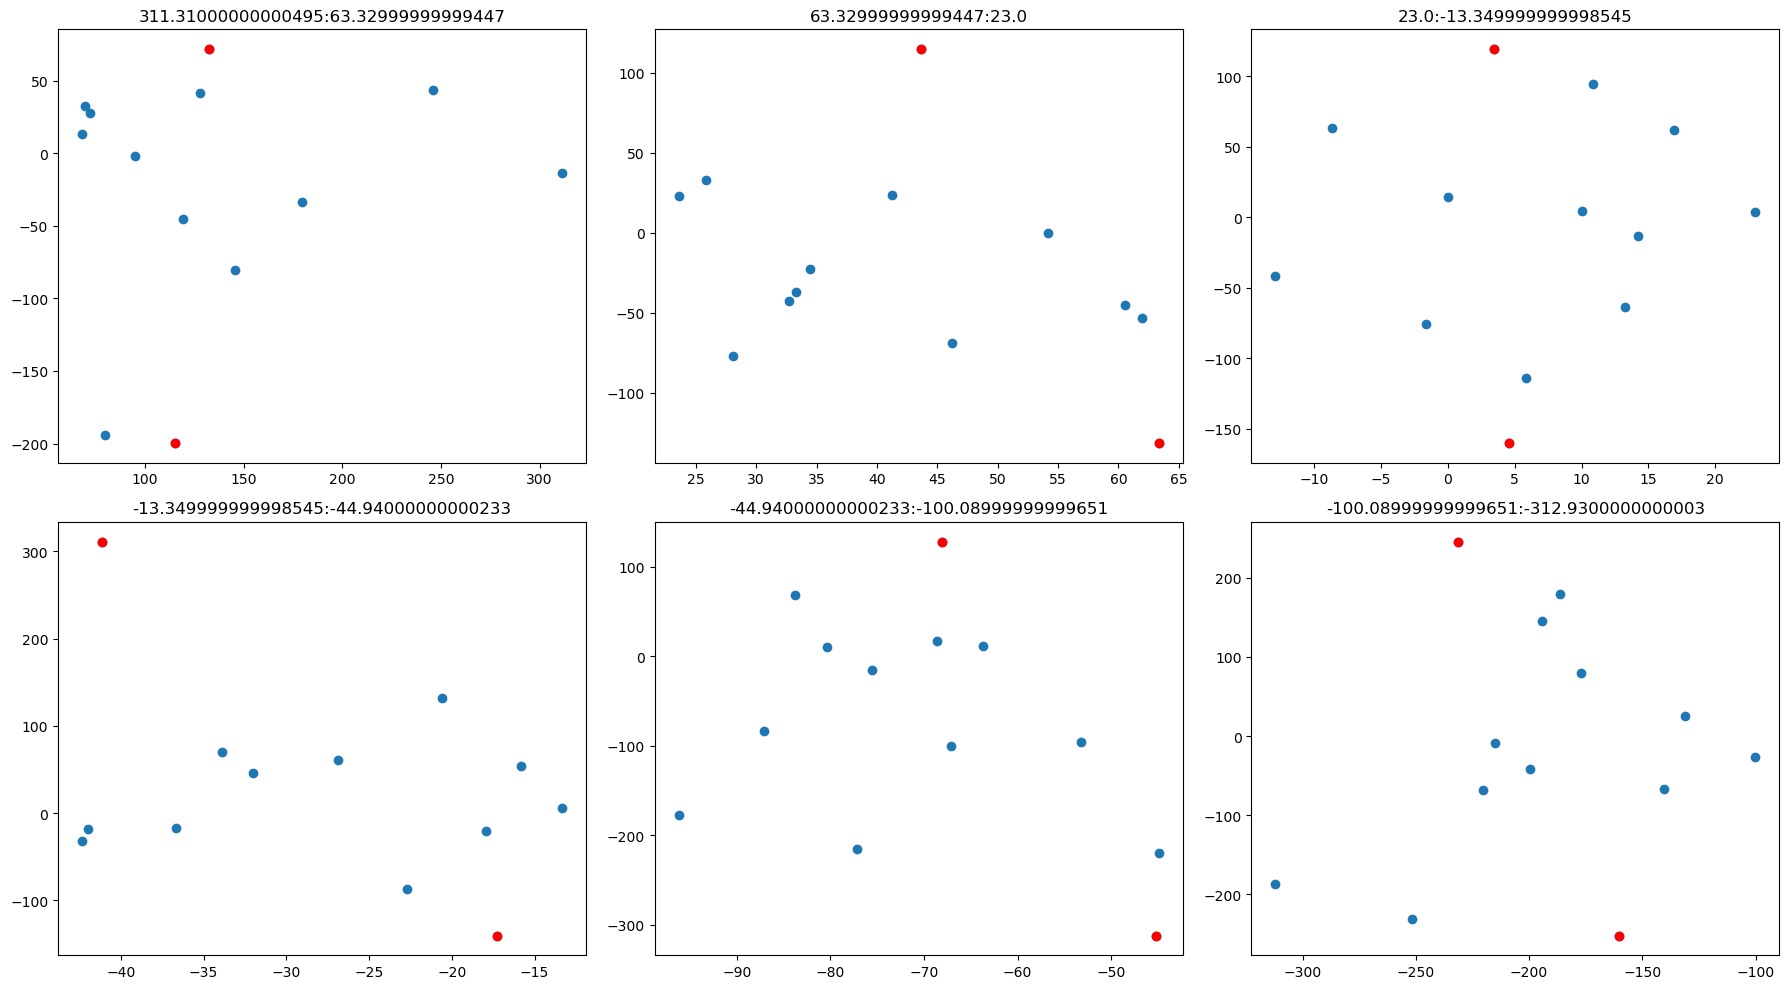

In [15]:
fig, axes = plt.subplots(nrows=((dxy.shape[0]//N)//3)+((dxy.shape[0]//N)%3>0), ncols=3, figsize=(18, 10))
for i in range(1, arr.shape[0]):
    mask = (dxy[:, 0] <= arr[i-1]) & (dxy[:, 0] > arr[i])
    data = dxy[mask][:, 1]

    row = (i - 1) // 3
    col = (i - 1) % 3

    ax = axes[row, col]
    ax.scatter(x=dxy[mask][:, 0], y=data)
    ax.set_title(f'{arr[i-1]}:{arr[i]}')
    mean = data.mean()

    low = np.percentile(data, 5)
    high = np.percentile(data, 95)
    mask_outliners = (data<low) | (data>high)

    ax.scatter(x=dxy[mask][mask_outliners][:, 0], y=data[mask_outliners], color='red')


plt.tight_layout()
plt.show()

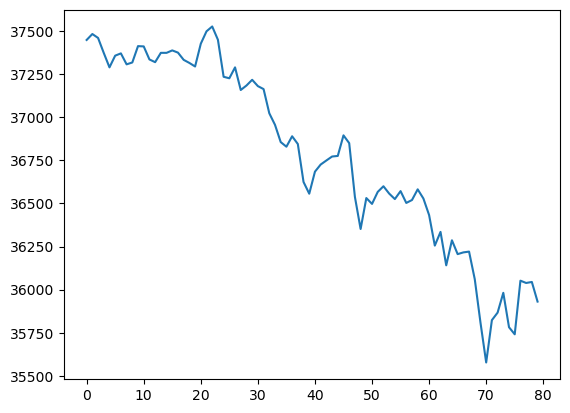

In [16]:
data = np.array(pd.read_csv('price.csv')[coin])
plt.plot(data)

In [17]:
data_winsorized = dxy[:, 1].copy()
data_winsorized

array([-2.2680e+01, -8.7060e+01, -8.3760e+01,  6.7930e+01,  1.3250e+01,
       -6.3670e+01,  1.0850e+01,  9.4870e+01, -1.6600e+00, -7.5590e+01,
       -1.5840e+01,  5.4130e+01, -2.0000e-02,  1.4190e+01, -1.2890e+01,
       -4.1960e+01, -1.7940e+01, -2.0570e+01,  1.3221e+02,  7.1880e+01,
        2.8110e+01, -7.7120e+01, -2.1481e+02, -8.6900e+00,  6.3330e+01,
       -1.3130e+02,  2.5850e+01,  3.3270e+01, -3.6650e+01, -1.7240e+01,
       -1.4029e+02, -6.7110e+01, -1.0009e+02, -2.6880e+01,  6.0560e+01,
       -4.4940e+01, -2.2031e+02, -6.8060e+01,  1.2791e+02,  4.1270e+01,
        2.3590e+01,  2.3000e+01,  3.4500e+00,  1.1942e+02, -4.5170e+01,
       -3.1193e+02, -1.8644e+02,  1.7963e+02, -3.3870e+01,  6.9620e+01,
        3.2710e+01, -4.2350e+01, -3.2030e+01,  4.6220e+01, -6.8630e+01,
        1.6950e+01,  6.1990e+01, -5.3210e+01, -9.6210e+01, -1.7709e+02,
        7.9510e+01, -1.9407e+02,  1.4537e+02, -8.0320e+01,  1.0050e+01,
        4.6000e+00, -1.6016e+02, -2.5187e+02, -2.3142e+02,  2.45

Final Stage: Here, I simply identified all the other steps, marked outliers with red dots, and constrained them by percentiles.

12
[21. 74. 27. 73. 45. 68. 32. 76. 40. 47. 69. 71.]


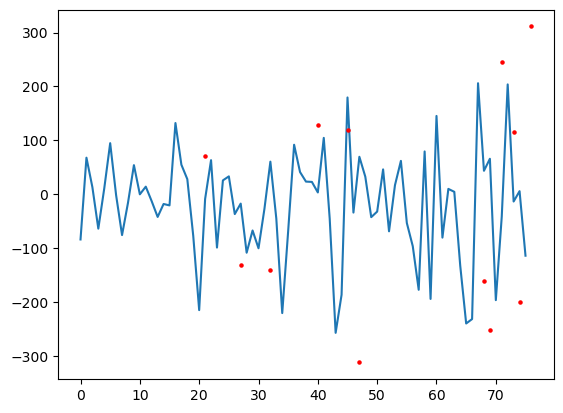

In [18]:
sum_o = 0

#plt.plot(data)
x = np.arange(0, 80)
xo = np.array(())
for i in range(arr.shape[0]-1):

    mask = (dxy[:, 0] <= arr[i]) & (dxy[:, 0] > arr[i+1])
    datat = dxy[mask][:, 1]
    xt = x[np.insert(mask, 0, np.zeros(2, dtype=bool))]

    low = np.percentile(datat, 5)
    high = np.percentile(datat, 95)
    mask_outliners = (datat<low) | (datat>high)

    xt = xt[mask_outliners]
    xo = np.append(xo, xt)
    datat = datat[mask_outliners]
    sum_o += xt.shape[0]
    plt.scatter(x=xt, y=datat, color='red', s=5, zorder=100)


    data_winsorized[mask] = np.clip(data_winsorized[mask], low, high)


print(sum_o)
print(xo)
plt.plot(data_winsorized[2:])
plt.show()

Now, in *data_winsorized*, smoothed steps are stored. So, I add the first two absolute coordinates, and from the second one, I create a cumulative sum.

In [19]:
data_winsorized = np.insert(data_winsorized, 0, data[:2])
data_winsorized[1:] = np.cumsum(data_winsorized[1:])
data_winsorized

array([37448.77 , 37483.25 , 37460.57 , 37373.51 , 37289.75 , 37357.68 ,
       37370.93 , 37307.26 , 37318.11 , 37412.98 , 37411.32 , 37335.73 ,
       37319.89 , 37374.02 , 37374.   , 37388.19 , 37375.3  , 37333.34 ,
       37315.4  , 37294.83 , 37427.04 , 37481.97 , 37510.08 , 37432.96 ,
       37218.15 , 37209.46 , 37272.79 , 37173.998, 37199.848, 37233.118,
       37196.468, 37179.228, 37070.876, 37003.766, 36903.676, 36876.796,
       36937.356, 36892.416, 36672.106, 36604.046, 36695.968, 36737.238,
       36760.828, 36783.828, 36787.278, 36891.968, 36846.798, 36589.84 ,
       36403.4  , 36583.03 , 36549.16 , 36618.78 , 36651.49 , 36609.14 ,
       36577.11 , 36623.33 , 36554.7  , 36571.65 , 36633.64 , 36580.43 ,
       36484.22 , 36307.13 , 36386.64 , 36192.57 , 36337.94 , 36257.62 ,
       36267.67 , 36272.27 , 36139.878, 35900.278, 35668.858, 35874.92 ,
       35918.55 , 35984.484, 35788.166, 35747.036, 35950.886, 35937.536,
       35943.396, 35829.516])

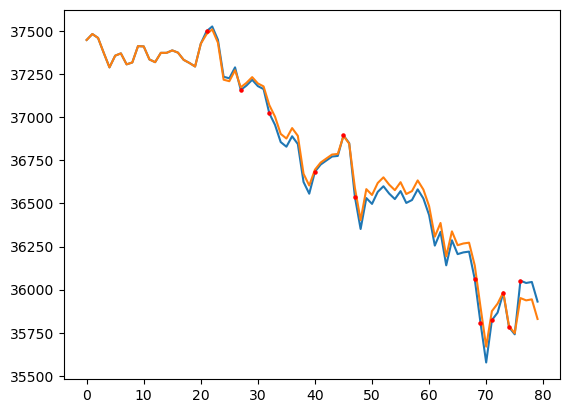

In [20]:
plt.scatter(x=xo, y=data[xo.astype(np.int16)], color='red', s=5, zorder=100)
plt.plot(data)
plt.plot(data_winsorized)